**TASK-02**
- Perform data cleaning and exploratory data analysis(EDA) on a dataset of your choice, such as the Titanic dataset from kaggle. <br>
Explore the relationships between variables and identify patterns and trends in the data.

**EXPLORATORY DATA ANAYLSIS**

In [41]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats




In [3]:
# Load the da
data = pd.read_csv('C:/Users/acer/Desktop/Data_science_projects/Titanic-Dataset.csv')

In [4]:
# Display the first 5 rows of the dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Display the last 5 rows of the dataset
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# Display the shape of the dataset
data.shape

(891, 12)

- The dataset contains 891 rows and 12 columns. This indicates that there are 891 entries, each with 12 attributes or features.

In [7]:
# Check the columns of the dataset
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- The dataset includes the following columns: 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', and 'Embarked'. These columns represent various attributes of passengers, such as their ID, survival status, class, name, gender, age, number of siblings/spouses aboard, number of parents/children aboard, ticket number, fare, cabin number, and port of embarkation.



In [8]:
# Check the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The DataFrame contains 891 entries and 12 columns. Each column represents a different attribute of the passengers, with the following data types:

- **PassengerId, Survived, Pclass, SibSp, Parch**: `int64`
- **Name, Sex, Ticket, Cabin, Embarked**: `object`
- **Age, Fare**: `float64`

The 'Age' column has 714 non-null values, indicating missing data for some entries. The 'Cabin' column has only 204 non-null values, suggesting a significant amount of missing data. The 'Embarked' column has 889 non-null values, with a few missing entries. 

In [9]:
# Check the number of missing values in the dataset
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The dataset has missing values in the 'Age', 'Cabin', and 'Embarked' columns:

1. **Age (177 missing values)**:
   - **Action**: Impute with the median age.
   - **Reason**: Age is important for analysis.

2. **Cabin (687 missing values)**:
   - **Action**: Drop the column.
   - **Reason**: Too many missing values make imputation unreliable. 

3. **Embarked (2 missing values)**:
   - **Action**: Impute with the most frequent value.
   - **Reason**: Few missing values. 

In [10]:
# Impute missing values in the 'Age' column with the median age
data['Age'] = data['Age'].fillna(data['Age'].median())

In [11]:
# Drop the 'Cabin' column
data.drop(columns=['Cabin'], inplace=True)

In [12]:
# Impute missing values in the 'Embarked' column with the most frequent value
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [13]:
# Check the number of missing values in the dataset
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
# Drop the rows with missing values in the 'Embarked' column
data.dropna(subset=['Embarked'], inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [16]:
# Check the number of unique values in the 'Name' column
data['Name'].nunique()


891

- This indicates that each passenger in the dataset has a unique name, and there are no duplicate names among the 891 entries.

In [17]:
# Check the summary statistics of the dataset
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The summary statistics for the dataset reveal the following observations:

1. **PassengerId**: Ranges from 1 to 891, indicating unique identifiers for each passenger.
2. **Survived**: The mean is 0.384, suggesting that approximately 38.4% of passengers survived.
3. **Pclass**: The mean is 2.309, indicating that most passengers were in the second or third class.
4. **Age**: The mean age is 29.36 years, with a standard deviation of 13.02 years. The ages range from 0.42 to 80 years.
5. **SibSp**: The mean is 0.523, indicating that most passengers had fewer than one sibling or spouse aboard.
6. **Parch**: The mean is 0.382, suggesting that most passengers had fewer than one parent or child aboard.
7. **Fare**: The mean fare is 32.20, with a wide range from 0 to 512.33, indicating significant variability in ticket prices.

These statistics provide insights into the distribution and central tendencies of the dataset's numerical features.

In [18]:
# Check the number of survivors and non-survivors
data['Survived'].value_counts().rename({0: 'Non-Survivors', 1: 'Survivors'})



Survived
Non-Survivors    549
Survivors        342
Name: count, dtype: int64

* The dataset indicates that out of 891 passengers, 549 did not survive, while 342 survived. This means that approximately 61.6% of the passengers did not survive, and 38.4% survived. This highlights the significant loss of life among the passengers.

In [19]:
# Check the number of passengers in each class
data['Pclass'].value_counts().sort_index().rename({1: 'First Class', 2: 'Second Class', 3: 'Third Class'})

Pclass
First Class     216
Second Class    184
Third Class     491
Name: count, dtype: int64

- The shows the distribution of passengers across different classes in the dataset. This indicates that the majority of passengers were in Third Class, followed by First Class and Second Class.

In [20]:
# Check how many passengers embarked at each port
data['Embarked'].value_counts().rename({'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'})


Embarked
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

- Most passengers embarked from Southampton (646), followed by Cherbourg (168) and Queenstown (77).

In [24]:
# Check the number of Male and Female passengers that survuved and did not survive
data.groupby("Sex")["Survived"].value_counts().unstack().rename(columns = {0: 'Non-Survivors', 1: 'Survivors'})

Survived,Non-Survivors,Survivors
Sex,,
female,81,233
male,468,109


The survival rates by gender show:

- **Females**: 233 survived, 81 did not.
- **Males**: 109 survived, 468 did not.

This indicates that a higher proportion of females survived compared to males.

In [23]:
# Check the number of passengers that survived and did not survive in each class
survival_by_class = data.groupby("Pclass")["Survived"].value_counts().unstack().rename(columns={0: 'Non-Survivors', 1: 'Survivors'})

# Display the updated DataFrame
survival_by_class

Survived,Non-Survivors,Survivors
Pclass,,
1,80,136
2,97,87
3,372,119


The survival rates by passenger class show:

- **First Class**: 136 survivors, 80 non-survivors.
- **Second Class**: 87 survivors, 97 non-survivors.
- **Third Class**: 119 survivors, 372 non-survivors.

This indicates that passengers in First Class had a higher survival rate compared to those in Second and Third Class. The majority of non-survivors were from Third Class.

In [26]:
# Check the number of passengers that survived and did not survive at each port
survival_by_port = data.groupby("Embarked")["Survived"].value_counts().unstack().rename(columns={0: 'Non-Survivors', 1: 'Survivors'})

# Display the updated DataFrame
survival_by_port

Survived,Non-Survivors,Survivors
Embarked,,
C,75,93
Q,47,30
S,427,219


The survival rates by embarkation port show:

- **Cherbourg (C)**: 93 survivors, 75 non-survivors.
- **Queenstown (Q)**: 30 survivors, 47 non-survivors.
- **Southampton (S)**: 219 survivors, 427 non-survivors.

This indicates that passengers who embarked from Cherbourg had a higher survival rate compared to those from Queenstown and Southampton. The majority of non-survivors embarked from Southampton.

**VIZUALIZATION**

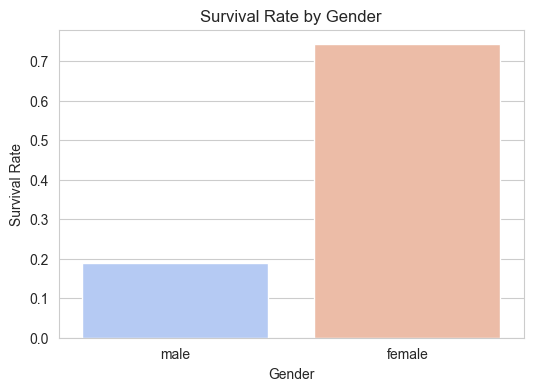

In [ ]:
# Plotting the survival rate by gender

sns.set_style("whitegrid") # Set plot style

# Create the bar plot
plt.figure(figsize =(6, 4))
sns.barplot(x = data["Sex"], y = data["Survived"], errorbar = None, hue = data["Sex"], palette = "coolwarm")

# Add labels and title
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Gender")

# Show the plot
plt.show()

**Observations:**
- Around 70% of females survived, compared to less than 20% of males.
- This suggests that the *“women and children first”* rule significantly influenced survival rates.
- Gender was a **strong determinant** of survival.

C:\Users\acer\AppData\Local\Temp\ipykernel_4952\2463573649.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = family_survival.index, y = family_survival.values, palette = "coolwarm")


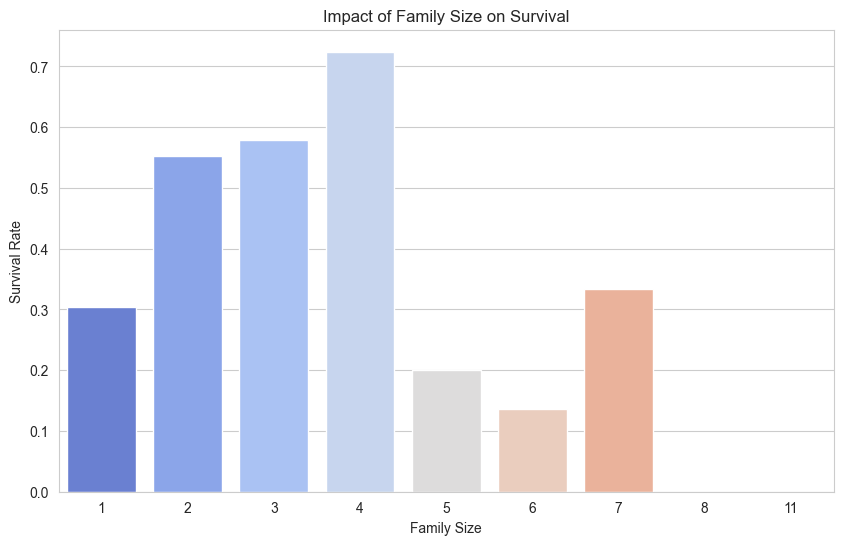

In [ ]:
# Plotting the impact of family size on survival 
data["Family_Size"] = data["SibSp"] + data["Parch"] + 1 # Create a new column for family size

# Group the data by family size and calculate the survival rate
family_survival = data.groupby("Family_Size")["Survived"].mean()

# Plot
plt.figure(figsize =(10, 6))
sns.barplot(x = family_survival.index, y = family_survival.values, palette = "coolwarm")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.title("Impact of Family Size on Survival")
plt.show()



 **Observations on Family Size & Survival**
- **Small families (2–4 members) had the highest survival rates**, probably because they could stick together and help each other.
- **Solo travelers had a lower chance of survival**, likely because they had no one looking out for them.
- **Larger families (5+) struggled more**, maybe because evacuating as a group was harder.
- **Weird spike at family size 7**, could just be a random anomaly.

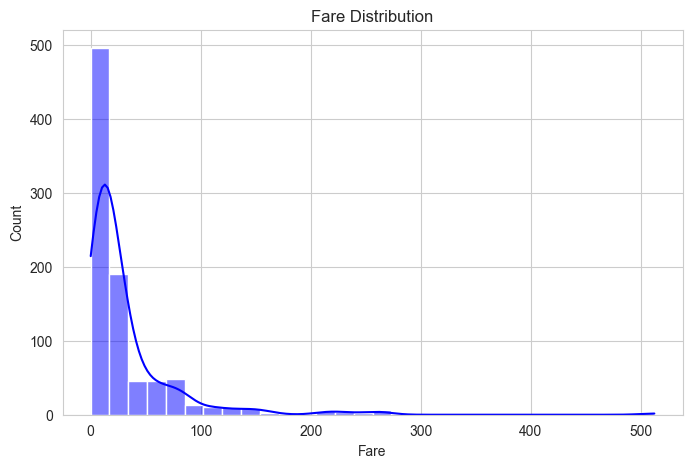

In [33]:
# Fare distribution analysis plot
plt.figure(figsize=(8,5))
sns.histplot(data['Fare'], bins=30, kde=True, color='blue')
plt.xlabel("Fare")
plt.ylabel("Count")
plt.title("Fare Distribution")
plt.show()


**Observations on Fare Distribution**
- Most passengers paid low fares, meaning third-class was packed.
- A few paid really high fares, likely first-class passengers.
- Right-Skewed distribution—a handful of people spent a lot, but most paid little.


C:\Users\acer\AppData\Local\Temp\ipykernel_4952\3544312891.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Survived', y='Fare', data = data, palette='muted')


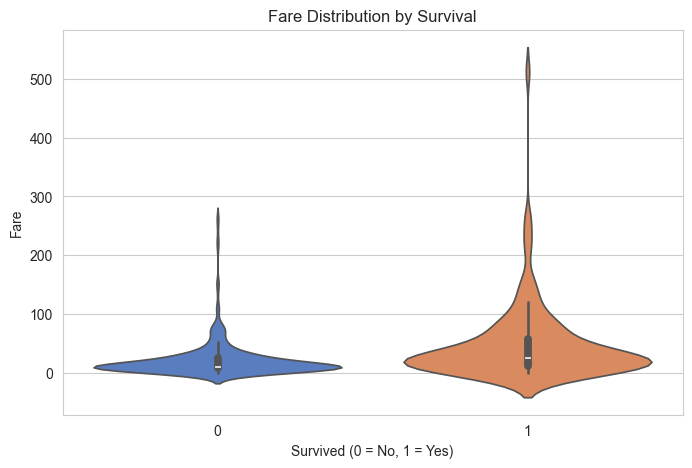

In [37]:
# Distribution of fare by survival
plt.figure(figsize=(8,5))
sns.violinplot(x='Survived', y='Fare', data = data, palette='muted')

plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.title('Fare Distribution by Survival')
plt.show()

**Observation:**

- Passengers who paid higher fares had a better chance of survival. 
- The distribution shows that most non-survivors paid lower fares, while survivors had a wider range, with some paying significantly higher fares. This suggests that fare price, likely linked to class, played a role in survival chances.

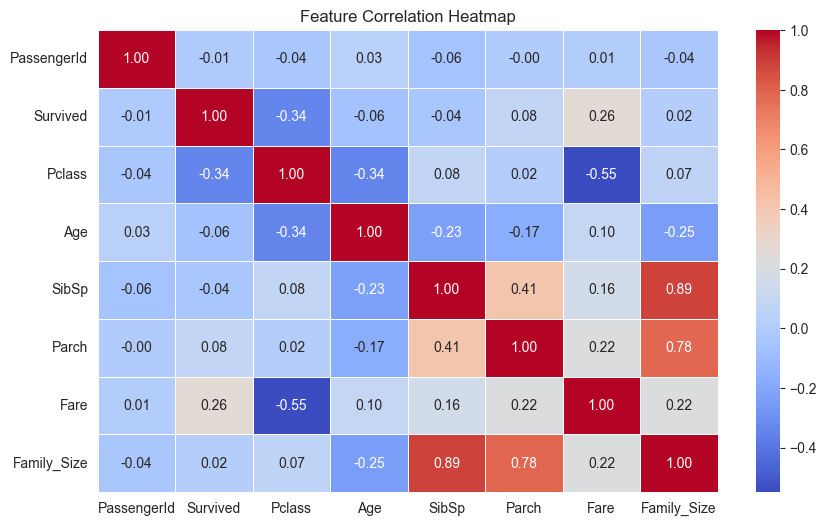

In [40]:
# Correlation heatmap
numeric_df = data.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

**Observation:**
- Survival is negatively correlated with Pclass (-0.34), meaning higher-class passengers had better survival rates.
- Fare correlates positively with survival (0.26), suggesting those who paid more had higher chances of survival.
- SibSp, Parch, and Family_Size are strongly related, as expected.
- Fare and Pclass show a strong negative correlation (-0.55), reinforcing that higher-class passengers paid more.
- PassengerId has strong correlations but isn’t meaningful, so it can be dropped.

**INFERENTIAL ANALYSIS**

In [44]:
# Chi-square test for Gender vs. Survival
contingency_table_gender = pd.crosstab(data['Sex'], data['Survived'])
chi2_gender, p_gender, _, _ = stats.chi2_contingency(contingency_table_gender)
print(f"Chi-Square Test for Gender vs. Survival: p-value = {p_gender}")



Chi-Square Test for Gender vs. Survival: p-value = 1.1973570627755645e-58


**Interpretation**
- The p-value is ridiculously small—basically zero. 
- This means gender **strongly** influences survival. In simpler terms, survival rates for males and females are **not random**; there’s a significant difference.

In [45]:
# Chi-square test for Pclass vs. Survival
contingency_table_pclass = pd.crosstab(data['Pclass'], data['Survived'])
chi2_pclass, p_pclass, _, _ = stats.chi2_contingency(contingency_table_pclass)
print(f"Chi-Square Test for Pclass vs. Survival: p-value = {p_pclass}")

Chi-Square Test for Pclass vs. Survival: p-value = 4.549251711298793e-23


**Interpretation**
- Another tiny p-value, which means passenger class **heavily** influenced survival. 
- In short, survival wasn’t evenly spread across classes—some had a much higher chance than others.

In [46]:
# Separate survivors and non-survivors
survivors = data[data['Survived'] == 1]
non_survivors = data[data['Survived'] == 0]

# T-test for Age
t_age, p_age = stats.ttest_ind(survivors['Age'].dropna(), non_survivors['Age'].dropna(), equal_var=False)
print(f"T-Test for Age: p-value = {p_age}")

# T-test for Fare
t_fare, p_fare = stats.ttest_ind(survivors['Fare'], non_survivors['Fare'], equal_var=False)
print(f"T-Test for Fare: p-value = {p_fare}")

T-Test for Age: p-value = 0.058309159977757444
T-Test for Fare: p-value = 2.6993323503141236e-11


Interpretation
- **Age**: The p-value is slightly above 0.05, so we can’t confidently say there’s a significant difference in age between survivors and non-survivors. There might be a trend, but it’s not strong enough to be conclusive.
- **Fare**: That p-value is ridiculously small, meaning fare definitely played a role in survival. In simple terms, those who paid higher fares had a significantly better chance of making it.